In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
file_path = '../data/dataset_velo_acc_preprocess.csv'

In [3]:
df = pd.read_csv(file_path, sep = ',')
df.drop(columns=['Unnamed: 0'], inplace=True)

C:\Users\coco8\AppData\Local\Temp\ipykernel_33896\18658636.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep = ',')


In [4]:
df.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'lum', 'agg', 'int', 'atm', 'col',
       'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'larrout', 'surf',
       'infra', 'situ', 'vma', 'catv', 'obs', 'obsm', 'choc', 'manv', 'grav',
       'manv2', 'catv2', 'obs2', 'obsm2', 'choc2'],
      dtype='object')

Colonnes à nettoyer : 
obs 
obsm
choc 
Manv     
grav 
senc

In [5]:
def obs_choc_manv_grav(df):
    
    list_columns = ["obs", "obsm", "choc", "manv", "grav"]
    
    for column in list_columns:
        df[column] = df[column].replace(-1, np.nan)
        df[column] = df[column].astype("Int64")

    return df

In [6]:
df = obs_choc_manv_grav(df)
df

,Num_Acc,jour,mois,an,lum,agg,int,atm,col,catr,...,obs,obsm,choc,manv,grav,manv2,catv2,obs2,obsm2,choc2
0,200500000030,13,1,5,5,2,1,1.0,3.0,3.0,...,0,2,7,17,1,11.0,1.0,0.0,2.0,8.0
1,200500000034,19,1,5,1,1,1,7.0,1.0,3.0,...,0,9,3,15,2,1.0,1.0,0.0,2.0,1.0
2,200500000078,26,1,5,1,1,9,1.0,3.0,3.0,...,0,2,2,15,1,1.0,1.0,0.0,2.0,1.0
3,200500000093,3,1,5,1,2,1,1.0,1.0,3.0,...,0,2,3,21,2,21.0,1.0,0.0,2.0,3.0
4,200500000170,29,1,5,3,1,1,1.0,2.0,3.0,...,0,2,4,2,1,2.0,10.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80846,202100056346,3,1,2021,5,2,1,1.0,7.0,3.0,...,0,1,1,13,1,NaN,NaN,NaN,NaN,NaN
80847,202100056362,4,1,2021,1,2,3,1.0,1.0,3.0,...,0,2,0,1,1,15.0,7.0,0.0,2.0,1.0
80848,202100056404,1,1,2021,5,2,2,1.0,3.0,4.0,...,0,2,1,25,1,1.0,7.0,0.0,2.0,1.0
80849,202100056424,2,1,2021,1,2,1,8.0,3.0,4.0,...,0,2,1,1,1,9.0,7.0,0.0,2.0,2.0


In [7]:
for x in df["obs"].unique():
    print(type(x))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'pandas._libs.missing.NAType'>
<class 'numpy.int64'>


Nombre de valeurs inconnues pour la colonne :  obs 
 0       76260
1        1970
12        613
14        451
16        261
8         233
13        200
6         197
15        162
9         110
2          94
<NA>       65
11         54
3          52
4          47
10         31
7          26
5          24
17          1
Name: obs, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  obsm 
 2       55386
0       13114
9        6748
1        4985
6         285
5         139
4         138
<NA>       56
Name: obsm, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  choc 
 1       29283
2        9980
0        9891
3        8860
8        7348
7        6795
4        4482
5        2293
6        1596
9         284
<NA>       39
Name: choc, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  grav 
 1       51255
2       26583
3        3013
<NA>        0
Name: grav, dtype: Int64


array([[<AxesSubplot: title={'center': 'obs'}>,
        <AxesSubplot: title={'center': 'obsm'}>],
       [<AxesSubplot: title={'center': 'choc'}>,
        <AxesSubplot: title={'center': 'grav'}>]], dtype=object)

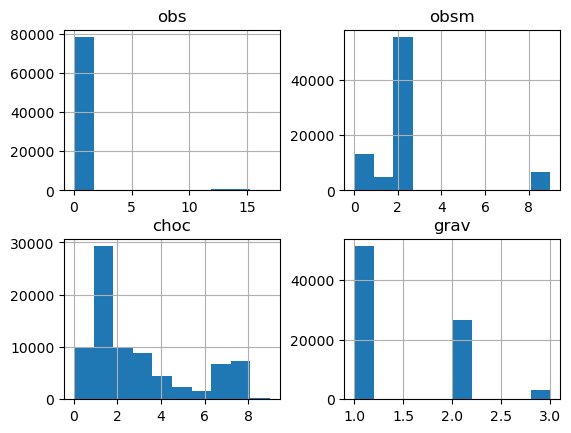

In [8]:
list_columns = ["obs", "obsm", "choc", "grav"]

for c in list_columns:
    print("Nombre de valeurs inconnues pour la colonne : ", c, "\n", df[c].value_counts(dropna = False))
    
df[list_columns].hist()

In [12]:
from sklearn.impute import SimpleImputer

def CategoricalImputation(df, list_columns):
    
    imputer = SimpleImputer(strategy='most_frequent')
    df_filled = pd.DataFrame(imputer.fit_transform(df[list_columns]), columns = list_columns)
    for column in list_columns:
        df_filled[column] = df_filled[column].astype("Int64")
    return df_filled

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def IterativeImputation(df, list_columns):
    
    # Setting the random_state argument for reproducibility
    imputer = IterativeImputer(random_state=42)
    df_filled = pd.DataFrame(imputer.fit_transform(df[list_columns]), columns = list_columns)
    df_filled = round(df_filled)
    
    for column in list_columns:
        df_filled[column] = df_filled[column].astype("Int64")
    
    return df_filled

In [31]:
df_filled = IterativeImputation(df, list_columns)
df_filled

,obs,obsm,choc,grav
0,0,2,7,1
1,0,9,3,2
2,0,2,2,1
3,0,2,3,2
4,0,2,4,1
...,...,...,...,...
80846,0,1,1,1
80847,0,2,0,1
80848,0,2,1,1
80849,0,2,1,1


Nombre de valeurs inconnues pour la colonne :  obs 
 0       76325
1        1970
12        613
14        451
16        261
8         233
13        200
6         197
15        162
9         110
2          94
11         54
3          52
4          47
10         31
7          26
5          24
17          1
<NA>        0
Name: obs, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  obsm 
 2       55442
0       13114
9        6748
1        4985
6         285
5         139
4         138
<NA>        0
Name: obsm, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  choc 
 1       29322
2        9980
0        9891
3        8860
8        7348
7        6795
4        4482
5        2293
6        1596
9         284
<NA>        0
Name: choc, dtype: Int64
Nombre de valeurs inconnues pour la colonne :  grav 
 1       51255
2       26583
3        3013
<NA>        0
Name: grav, dtype: Int64


array([[<AxesSubplot: title={'center': 'obs'}>,
        <AxesSubplot: title={'center': 'obsm'}>],
       [<AxesSubplot: title={'center': 'choc'}>,
        <AxesSubplot: title={'center': 'grav'}>]], dtype=object)

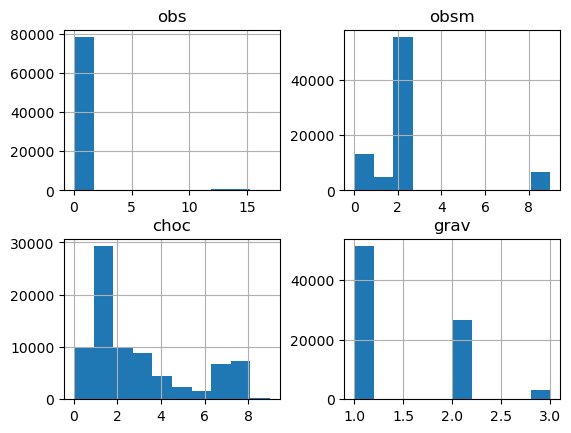

In [14]:
list_columns = ["obs", "obsm", "choc", "grav"]

for c in list_columns:
    print("Nombre de valeurs inconnues pour la colonne : ", c, "\n", df_filled[c].value_counts(dropna = False))
    
df[list_columns].hist()